In [11]:
from ROOT import TFile
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Corrections/"
inputFile = "transformation_pho_presel_BDTUpto6000.root"
file = TFile(path+inputFile)

In [4]:
var = [
        "EtaWidth",
        "PhiWidth",
        "full5x5sieie",
        "full5x5sieip",
        "full5x5R9",
        "S4",
        "rho",
        ]
phType = ["EE","EB"]

hist = {}
for v in var:
    for ph in phType:
        hist["transf"+v+ph] = file.Get("transf"+v+ph)

In [5]:
x = ROOT.Double(0)
y = ROOT.Double(0)

func = {}
for k in hist.keys():
    xarr,yarr = [],[]
    for i in range(hist[k].GetN()):
        hist[k].GetPoint(i,x,y)
        #print(x,y)
        xarr.append(float(x))
        yarr.append(float(y))
        
    func[k] = [xarr,yarr]
    

In [32]:
def transf(x0,f):
    x,y = np.array(f[0]), np.array(f[1])
    n = np.sum(x<x0) 
    m = (y[n]-y[n-1])/(x[n] - x[n-1])
    b = y[n]-m*x[n]

    return m*x0+b

In [33]:
x = np.array(func[list(hist.keys())[-1]][0])
y = np.array(func[list(hist.keys())[-1]][1])

In [34]:
k = "transffull5x5R9EE"

x1,y1 = [],[]
xrange = np.arange(func[k][0][0],func[k][0][-1],step=(func[k][0][-1] -func[k][0][0])/4000)
for xr in xrange:
    x1.append(xr)
    y1.append(transf(xr,func[k]))

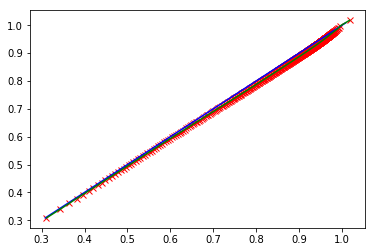

In [31]:

if min(func[k][0]) < min(func[k][1]):
    xmin = min(func[k][0])
else:
    xmin = min(func[k][1])

if max(func[k][0]) < max(func[k][1]):
    xmax = max(func[k][1])
else:
    xmax = max(func[k][0])
    
x = np.arange(xmin,xmax,step = 0.1)
    
plt.figure()
plt.plot(func[k][0],func[k][1],'xr')
plt.plot(x,x,'-b')
plt.plot(x1,y1,'-g')
plt.show()

In [13]:
hist.keys()

dict_keys(['transfEtaWidthEE', 'transfEtaWidthEB', 'transfPhiWidthEE', 'transfPhiWidthEB', 'transffull5x5sieieEE', 'transffull5x5sieieEB', 'transffull5x5sieipEE', 'transffull5x5sieipEB', 'transffull5x5R9EE', 'transffull5x5R9EB', 'transfS4EE', 'transfS4EB', 'transfrhoEE', 'transfrhoEB'])

In [19]:
#hist["full5x5R9"]

[[0.31127561150505156,
  0.3431902712500775,
  0.3642675365778212,
  0.38153170979285156,
  0.3958456615982335,
  0.4093496944586826,
  0.4207181828200777,
  0.4305065542217729,
  0.43967043330716843,
  0.44831385821991077,
  0.45664144812121094,
  0.46445018329187276,
  0.47182625348347534,
  0.4786751133380607,
  0.4850820698743336,
  0.49127864492834955,
  0.4972560708630013,
  0.5031466496827203,
  0.5086615210918735,
  0.5140424546264633,
  0.5194038776499772,
  0.5249115497076285,
  0.5304526598960189,
  0.5358609927232345,
  0.5411560027550688,
  0.5464454155961896,
  0.5516323752607734,
  0.5568394252266353,
  0.5618655896081436,
  0.5668620111490877,
  0.5717170944623998,
  0.5767448890516934,
  0.5814198850403998,
  0.5861679446947754,
  0.5907898787682794,
  0.5954513382876894,
  0.5998932719520987,
  0.6044363160530171,
  0.6088438469005953,
  0.6131607025958146,
  0.617485518945059,
  0.6217421464765307,
  0.6258735294530335,
  0.6297818745909033,
  0.6337268945810474,
  0